In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats as scipy

In [7]:
dir(scipy)

['BootstrapMethod',
 'CensoredData',
 'ConstantInputWarning',
 'Covariance',
 'DegenerateDataWarning',
 'FitError',
 'MonteCarloMethod',
 'NearConstantInputWarning',
 'PermutationMethod',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_axis_nan_policy',
 '_biasedurn',
 '_binned_statistic',
 '_binomtest',
 '_boost',
 '_censored_data',
 '_common',
 '_constants',
 '_continuous_distns',
 '_covariance',
 '_crosstab',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_entropy',
 '_fit',
 '_hypotests',
 '_kde',
 '_ksstats',
 '_levy_stable',
 '_mannwhitneyu',
 '_morestats',
 '_mstats_basic',
 '_mstats_extras',
 '_multicomp',
 '_multivariate',
 '_mvn',
 '_odds_ratio',
 '_page_trend_test',
 '_qmc',
 '_qmc_cy',
 '_qmvnt',
 '_rcont',
 '_relative_risk',
 '_resampling',
 '_rvs_sampling',
 '_sensitivity_analysis',
 '_sobol',
 '_statlib',
 '_stats',
 '_stats_mstats_common',
 '_stats_py',
 '_s

In [21]:
import yfinance as yf

In [11]:
dir(yf)

['Ticker',
 'Tickers',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'base',
 'cache',
 'const',
 'data',
 'download',
 'enable_debug_mode',
 'exceptions',
 'multi',
 'pdr_override',
 'scrapers',
 'set_tz_cache_location',
 'shared',
 'ticker',
 'tickers',
 'utils',
 'version']

In [22]:
ticker=yf.Ticker('NVDA')
strt='2000-01-10'
endd='2024-01-10'
intervall='1d'

In [23]:
data=ticker.history(interval=intervall,start=strt,end=endd)
data.tail()
data.reset_index(inplace=True)
data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
6033,2024-01-03 00:00:00-05:00,474.850006,481.839996,473.200012,475.690002,32089600,0.0,0.0
6034,2024-01-04 00:00:00-05:00,477.670013,485.000000,475.079987,479.980011,30653500,0.0,0.0
6035,2024-01-05 00:00:00-05:00,484.619995,495.470001,483.059998,490.970001,41456800,0.0,0.0
6036,2024-01-08 00:00:00-05:00,495.119995,522.750000,494.790009,522.530029,64251000,0.0,0.0
6037,2024-01-09 00:00:00-05:00,524.010010,543.250000,516.900024,531.400024,77310000,0.0,0.0


In [24]:
data['returns']=(data['Close']/data['Open']-1)*100
data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns
6033,2024-01-03 00:00:00-05:00,474.850006,481.839996,473.200012,475.690002,32089600,0.0,0.0,0.176897
6034,2024-01-04 00:00:00-05:00,477.670013,485.000000,475.079987,479.980011,30653500,0.0,0.0,0.483597
6035,2024-01-05 00:00:00-05:00,484.619995,495.470001,483.059998,490.970001,41456800,0.0,0.0,1.310306
6036,2024-01-08 00:00:00-05:00,495.119995,522.750000,494.790009,522.530029,64251000,0.0,0.0,5.536039
6037,2024-01-09 00:00:00-05:00,524.010010,543.250000,516.900024,531.400024,77310000,0.0,0.0,1.410281


In [7]:
scipy.tstd(data['returns'], limits=None, inclusive=(True, True), axis=0, ddof=1, *, nan_policy='propagate', keepdims=False)

SyntaxError: iterable argument unpacking follows keyword argument unpacking (3328845570.py, line 1)

In [25]:
daysinyear=251
meassurment_t=data.index.max()
std=data['returns'].std()
volatility=std/np.sqrt(meassurment_t)
yvol=volatility*np.sqrt(daysinyear)
print("volatility is",volatility)
print("std of returns is",round(std,5))
print("yearly volatility is",yvol)

volatility is 0.0408628278825214
std of returns is 3.17497
yearly volatility is 0.6473889451803287


In [26]:
print("Last Close is:",data['Close'].loc[data.index[-1]])
S_t=data['Close'].loc[data.index[-1]]

Last Close is: 531.4000244140625


# Black-Scholes model:
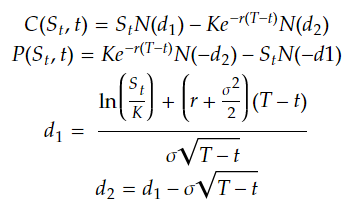

In [27]:
K=500
Type=['C']
S_t=S_t
r=0.02
dte=365
vol=yvol

In [14]:
from scipy.stats import norm

In [28]:
d_1=(np.log(S_t/K)+(r+(vol**2)/2)*(dte/365))/(vol*np.sqrt(dte/365))
d_2=d_1-(vol*np.sqrt(dte/365))
         
C=S_t*norm.cdf(x=d_1,loc=0,scale=1)-K*np.exp(-r*(dte)/2)*norm.cdf(x=d_2,loc=0,scale=1)
P=K*np.exp(-r*(dte/365))*norm.cdf(x=-d_2,loc=0,scale=1)-S_t*norm.cdf(x=-d_1,loc=0,scale=1)
print(C)
print(P)

352.2454720833083
109.96919911560155


In [33]:
def Black_Scholes(K,dte,Type='C'):
    d_1=(np.log(S_t/K)+(r+(vol**2)/2)*(dte/365))/(vol*np.sqrt(dte/365))
    d_2=d_1-(vol*np.sqrt(dte/365))
    try:
        if Type=='C':
            Price=S_t*norm.cdf(x=d_1,loc=0,scale=1)-K*np.exp(-r*(dte)/2)*norm.cdf(x=d_2,loc=0,scale=1)
        elif Type=='P':
            Price=K*np.exp(-r*(dte/365))*norm.cdf(x=-d_2,loc=0,scale=1)-S_t*norm.cdf(x=-d_1,loc=0,scale=1)
        return Price
    except:
        print("Error")

In [40]:
print(Black_Scholes(K=600, dte=180,Type='P'))

135.52571261653367


In [38]:
from scipy.stats import norm